In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [40]:
df_retail = pd.read_csv('./data/retail_sales_dataset.csv', index_col='Transaction ID')
df_retail

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Transaction ID,,,,,,,,
1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...
996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
998,2023-10-29,CUST998,Female,23,Beauty,4,25,100


In [4]:
df_retail.describe()

,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


In [41]:
df_retail['Date'] = pd.to_datetime(df_retail["Date"], format='%Y-%m-%d')
df_retail.Gender = pd.Categorical(df_retail.Gender, ordered=False)
df_retail['Product Category'] = pd.Categorical(df_retail['Product Category'], ordered=False)
df_retail

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Transaction ID,,,,,,,,
1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...
996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
998,2023-10-29,CUST998,Female,23,Beauty,4,25,100


# 1. How does customer age and gender influence their purchasing behavior?

<Figure size 1000x500 with 0 Axes>

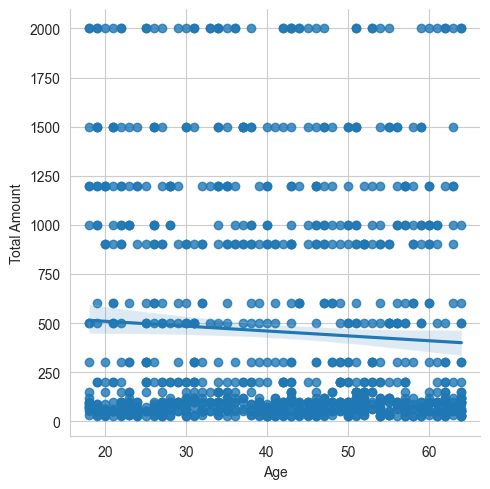

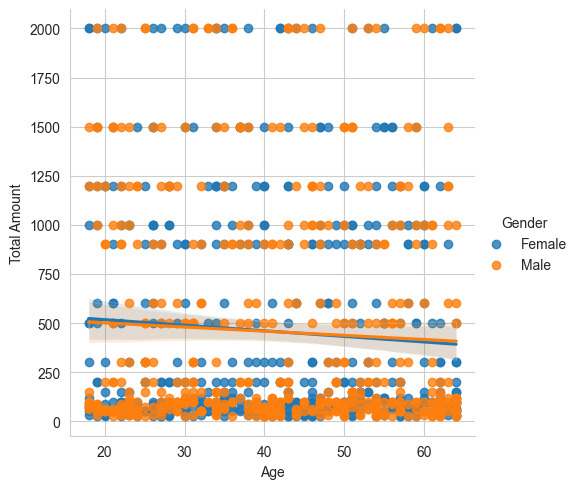

In [31]:
plt.figure(figsize=(10,5))
sns.lmplot(data=df_retail, x='Age', y='Total Amount')
sns.lmplot(data=df_retail, x='Age', y='Total Amount', hue = 'Gender')

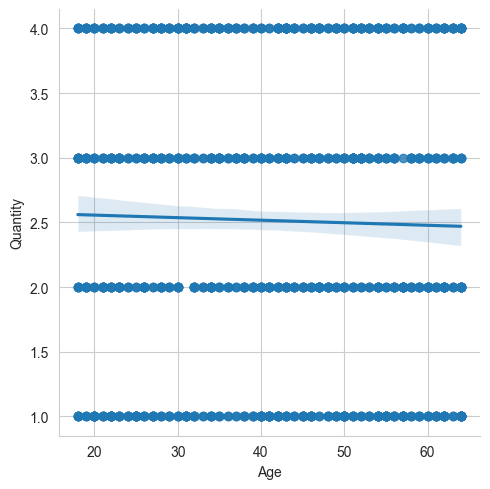

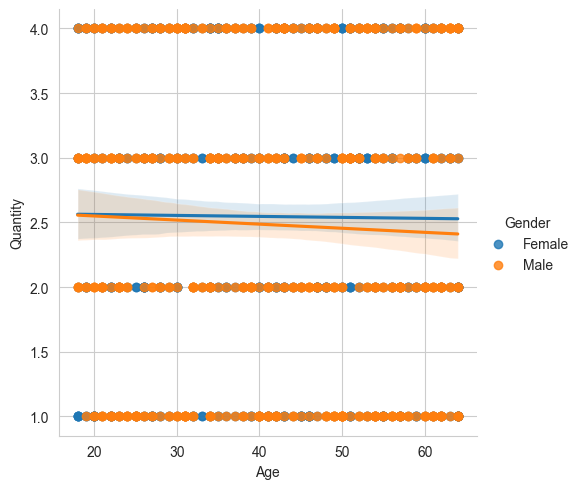

In [19]:
sns.lmplot(data=df_retail, x='Age', y='Quantity')
sns.lmplot(data=df_retail, x='Age', y='Quantity', hue = 'Gender')

/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Gender', ylabel='Quantity'>

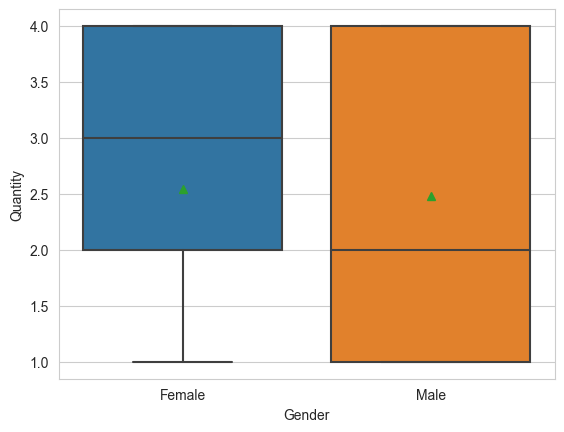

In [16]:
# sns.boxplot(data=df_retail, x='Gender', y='Total Amount')
sns.boxplot(data=df_retail, x='Gender', y='Quantity', showmeans=True)

/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Gender', ylabel='Total Amount'>

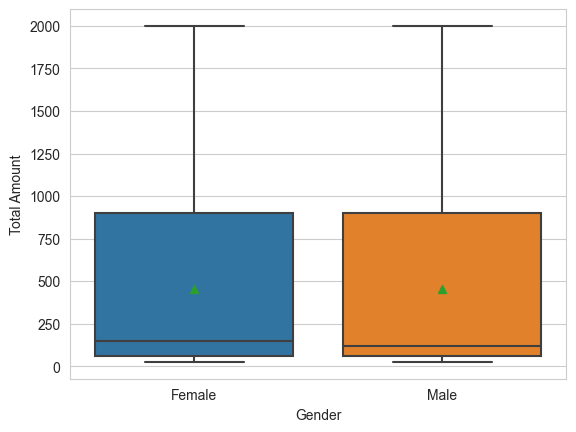

In [17]:
sns.boxplot(data=df_retail, x='Gender', y='Total Amount', showmeans=True)

In [34]:
from scipy.stats import ttest_ind

ttest_ind(df_retail.loc[df_retail.Gender == 'Male']['Quantity'], df_retail.loc[df_retail.Gender != 'Male']['Quantity'])

TtestResult(statistic=-0.8856152784717611, pvalue=0.37603820712599534, df=998.0)

/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Product Category', ylabel='Total Amount'>

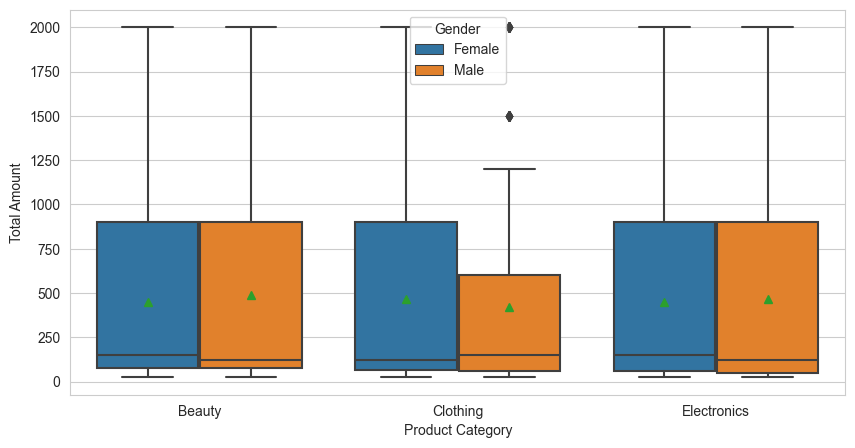

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_retail, x='Product Category', y='Total Amount', hue='Gender', showmeans=True)

# 2.Are there discernible patterns in sales across different time periods?



In [24]:
total_am = df_retail.groupby('Date')['Total Amount'].sum()

/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.

<Axes: xlabel='Date', ylabel='Total Amount'>

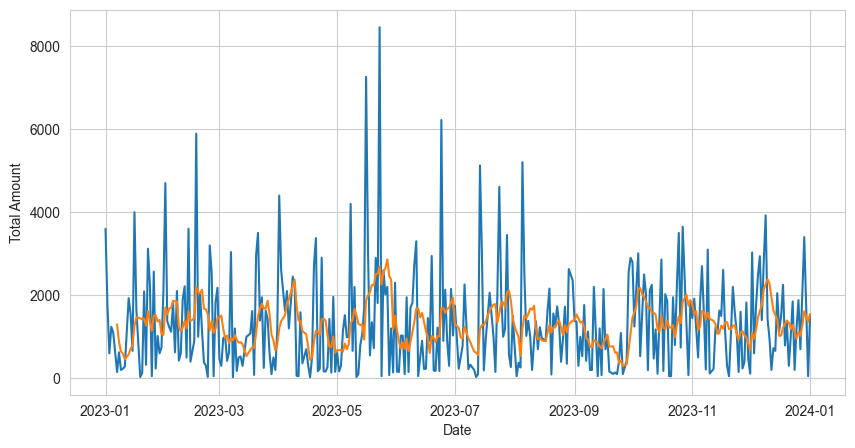

In [29]:
plt.figure(figsize=(10,5))
sns.lineplot(data=total_am)
sns.lineplot(data=total_am.rolling(7).mean())

In [65]:
total_am

Date
2023-01-01    3600
2023-01-02    1765
2023-01-03     600
2023-01-04    1240
2023-01-05    1100
              ... 
2023-12-27     700
2023-12-28    2075
2023-12-29    3400
2023-12-31      50
2024-01-01    1530
Name: Total Amount, Length: 345, dtype: int64

<Axes: xlabel='Date'>

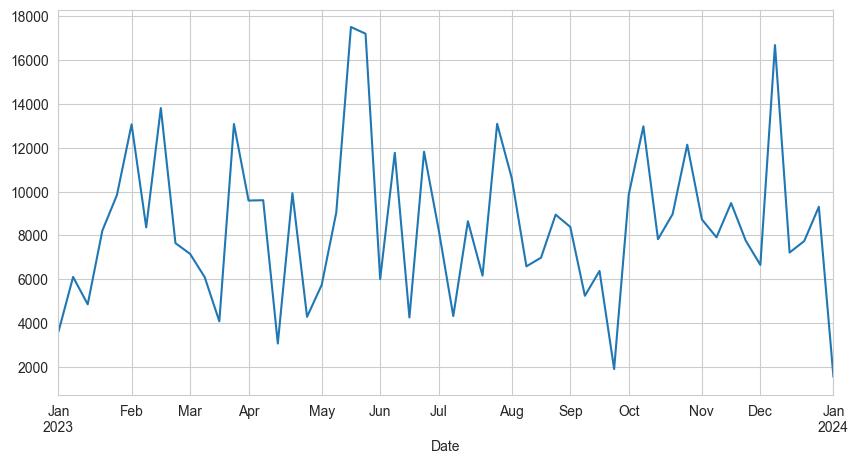

In [30]:
plt.figure(figsize=(10,5))
total_am.resample("W", kind = 'period').sum().plot()

<Axes: xlabel='Date'>

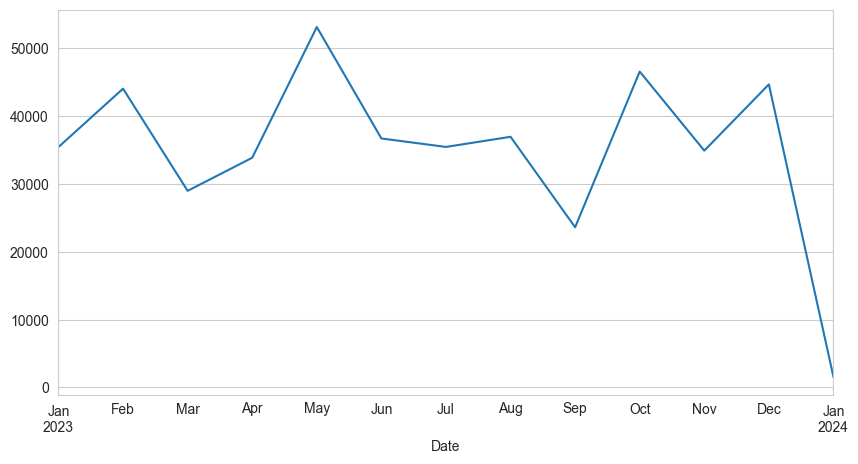

In [32]:
plt.figure(figsize=(10,5))
total_am.resample("M", kind = 'period').sum().plot()

# 3. What are the relationships between age, spending, and product preferences?



In [114]:
df_retail

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Transaction ID,,,,,,,,
1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...
996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
998,2023-10-29,CUST998,Female,23,Beauty,4,25,100


<Axes: xlabel='Age', ylabel='Total Amount'>

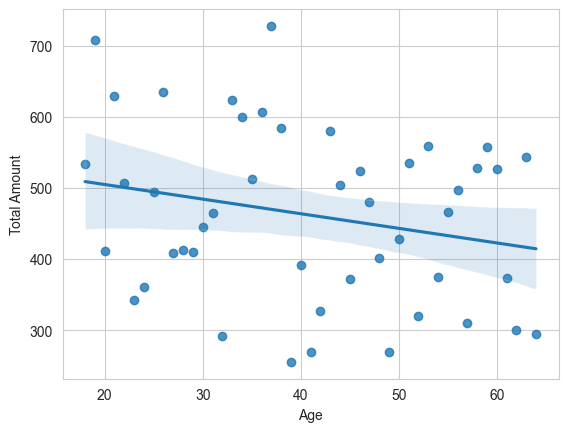

In [117]:
sp_age = df_retail[['Age','Total Amount']].groupby('Age').mean()
sns.regplot(x=sp_age.index, y=sp_age['Total Amount'])

In [118]:
sp_age_cat = df_retail[['Age','Product Category','Total Amount']].groupby(['Age','Product Category']).mean().reset_index()

/var/folders/2k/kp7vx_k946ggnbsk9nnnx0sm0000gp/T/ipykernel_45238/330467675.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sp_age_cat = df_retail[['Age','Product Category','Total Amount']].groupby(['Age','Product Category']).mean().reset_index()


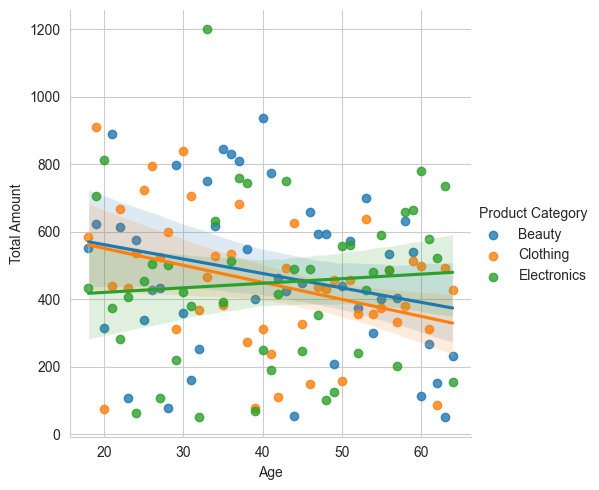

In [121]:
sns.lmplot(data=sp_age_cat, x='Age', y='Total Amount', hue = 'Product Category')

# 4. How do customers adapt their shopping habits during seasonal trends?



In [80]:
df_retail

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Transaction ID,,,,,,,,
1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...
996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
998,2023-10-29,CUST998,Female,23,Beauty,4,25,100


In [34]:
total_am_cat = df_retail.groupby(['Date','Product Category'])['Total Amount'].sum()#.reset_index('Product Category')
total_am_cat

/var/folders/2k/kp7vx_k946ggnbsk9nnnx0sm0000gp/T/ipykernel_50554/4265796496.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_am_cat = df_retail.groupby(['Date','Product Category'])['Total Amount'].sum()#.reset_index('Product Category')


Date        Product Category
2023-01-01  Beauty              1500
            Clothing            2100
            Electronics            0
2023-01-02  Beauty                25
            Clothing            1650
                                ... 
2023-12-31  Clothing               0
            Electronics           50
2024-01-01  Beauty              1500
            Clothing               0
            Electronics           30
Name: Total Amount, Length: 1035, dtype: int64

<Axes: xlabel='Date'>

<Figure size 1000x500 with 0 Axes>

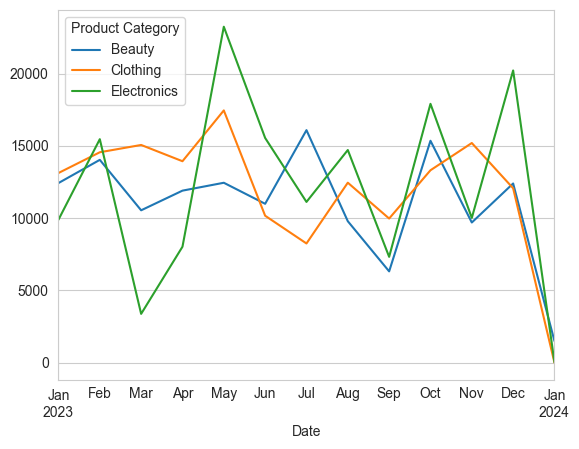

In [35]:

total_am_cat.unstack().resample('M', kind='period').sum().plot()

# 5. Are there distinct purchasing behaviors based on the number of items bought per transaction?



In [9]:
pb_on_q = df_retail[['Quantity','Total Amount']].groupby('Quantity').mean().reset_index()

In [10]:
pb_on_q['spent_per_unit'] = pb_on_q['Total Amount']/pb_on_q['Quantity']


/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.

<Axes: xlabel='Quantity', ylabel='spent_per_unit'>

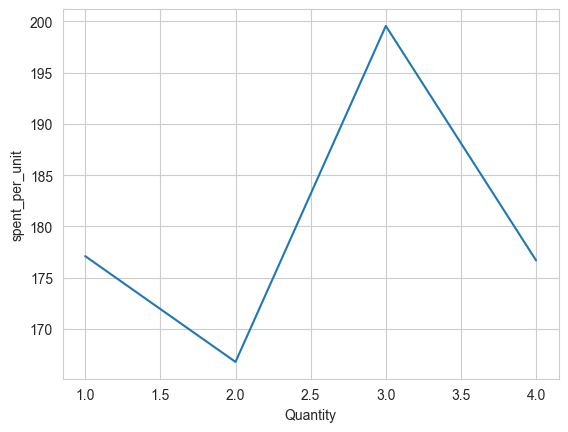

In [11]:
sns.lineplot(data=pb_on_q, x='Quantity', y='spent_per_unit')

/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Quantity', ylabel='Price per Unit'>

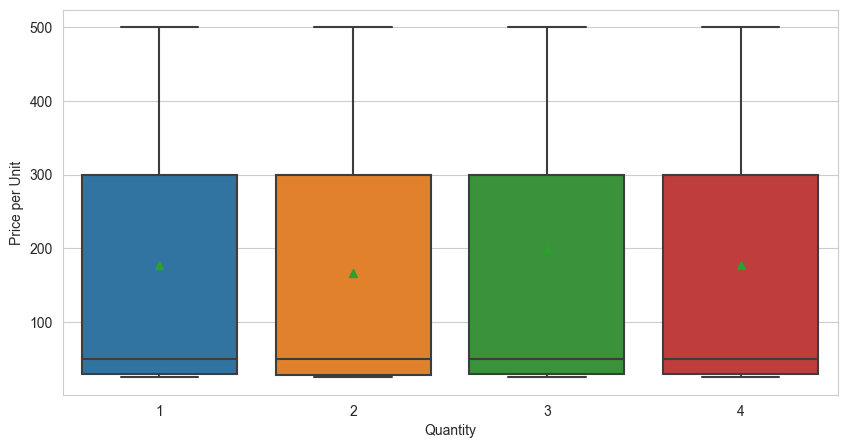

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(df_retail, x = 'Quantity', y = 'Price per Unit',showmeans=True)

/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Quantity', ylabel='Total Amount'>

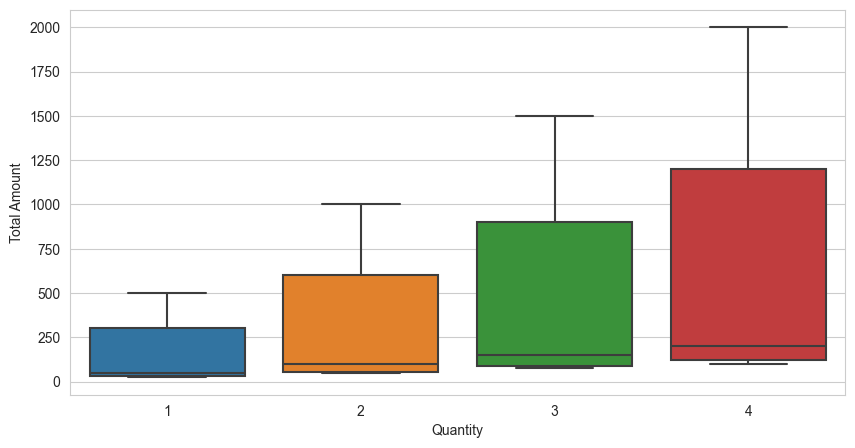

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(df_retail, x = 'Quantity', y = 'Total Amount')

/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Quantity', ylabel='Total Amount'>

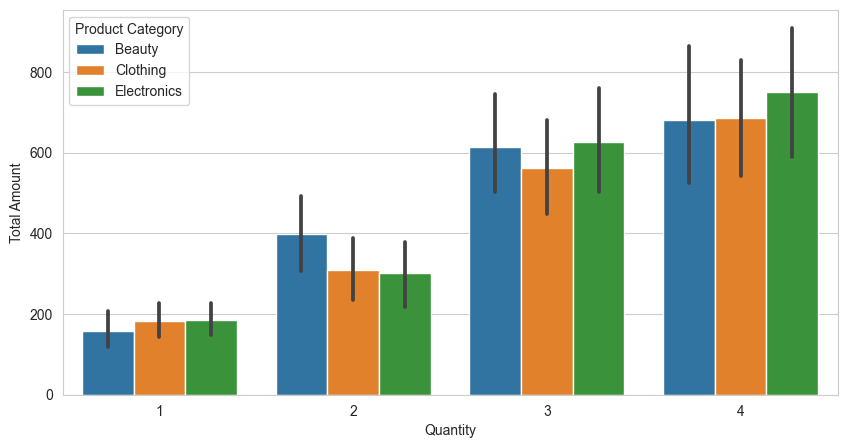

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(df_retail, x = 'Quantity', y = 'Total Amount', hue='Product Category')

# 6. What insights can be gleaned from the distribution of product prices within each category?

In [107]:
df_retail

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Transaction ID,,,,,,,,
1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...
996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
998,2023-10-29,CUST998,Female,23,Beauty,4,25,100


In [ ]:
df_retail.groupby('Product Category')

/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sbashkatov/Desktop/all_code/environments/python_ml/venv/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Product Category', ylabel='Price per Unit'>

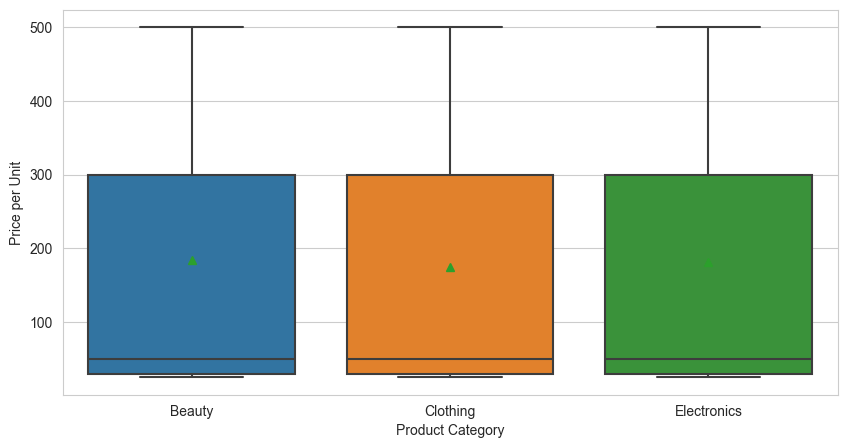

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(df_retail[['Product Category','Price per Unit']], x = 'Product Category', y='Price per Unit', showmeans=True)

In [111]:
df_retail[['Product Category','Price per Unit']].groupby('Product Category').mean()

/var/folders/2k/kp7vx_k946ggnbsk9nnnx0sm0000gp/T/ipykernel_45238/2467913311.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_retail[['Product Category','Price per Unit']].groupby('Product Category').mean()


,Price per Unit
Product Category,
Beauty,184.055375
Clothing,174.287749
Electronics,181.900585


In [112]:
df_retail[['Product Category','Price per Unit']].groupby('Product Category').describe()

/var/folders/2k/kp7vx_k946ggnbsk9nnnx0sm0000gp/T/ipykernel_45238/3024484823.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_retail[['Product Category','Price per Unit']].groupby('Product Category').describe()


Price per Unit                                            \
                          count        mean         std   min   25%   50%   
Product Category                                                            
Beauty                    307.0  184.055375  194.929399  25.0  30.0  50.0   
Clothing                  351.0  174.287749  186.017065  25.0  30.0  50.0   
Electronics               342.0  181.900585  189.049673  25.0  30.0  50.0   

                                
                    75%    max  
Product Category                
Beauty            300.0  500.0  
Clothing          300.0  500.0  
Electronics       300.0  500.0